## Aula 1

In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 3.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.4/436.4 KB 3.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.7/782.7 KB 2.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 KB 4.5 MB/s eta 0:00:002.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 KB 1.4 MB/s eta 0:00:001.2 MB/s eta 0:00:01


In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.4.1%2Bcu118-cp310-cp310-linux_x86_64.whl (857.6 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.19.1%2Bcu118-cp310-cp310-linux_x86_64.whl (6.3 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.4.1%2Bcu118-cp310-cp310-linux_x86_64.whl (3.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 28.0 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:0031m32.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 21.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

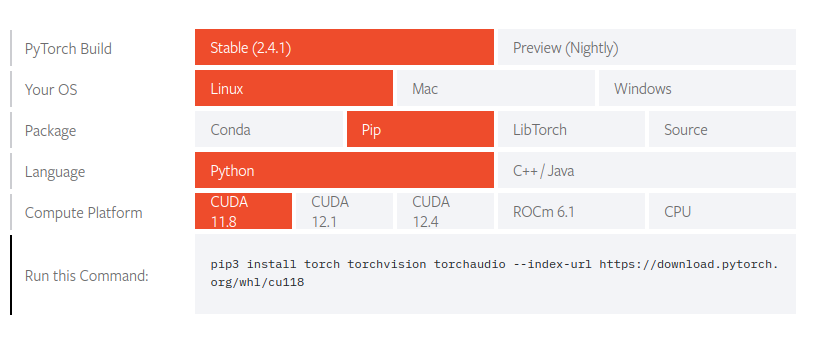

https://pytorch.org/get-started/locally/

In [2]:
from transformers import pipeline


In [22]:

modelo = pipeline('fill-mask') # tarefa/modelo de ia que completa a frase com a palavra + provavel
predicoes = modelo.predict('The capital of <mask> is Brasilia.') # onde tem o  <mask> é o que a ia deve completar
print(predicoes)


No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/home/anamarcacini/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: Future

[{'score': 0.8912569284439087, 'token': 2910, 'token_str': ' Brazil', 'sequence': 'The capital of Brazil is Brasilia.'}, {'score': 0.014173426665365696, 'token': 8062, 'token_str': ' Portugal', 'sequence': 'The capital of Portugal is Brasilia.'}, {'score': 0.011134975589811802, 'token': 1005, 'token_str': ' Europe', 'sequence': 'The capital of Europe is Brasilia.'}, {'score': 0.006918243132531643, 'token': 1846, 'token_str': ' crime', 'sequence': 'The capital of crime is Brasilia.'}, {'score': 0.005376866552978754, 'token': 24755, 'token_str': ' Angola', 'sequence': 'The capital of Angola is Brasilia.'}]


In [4]:

for predicao in predicoes:
    resposta = predicao['token_str']
    score = predicao['score']
    frase = predicao['sequence']
    print(f'Predição "{resposta}" com score {(score * 100):.2f}% -> "{frase}"')



Predição " Brazil" com score 89.13% -> "The capital of Brazil is Brasilia."
Predição " Portugal" com score 1.42% -> "The capital of Portugal is Brasilia."
Predição " Europe" com score 1.11% -> "The capital of Europe is Brasilia."
Predição " crime" com score 0.69% -> "The capital of crime is Brasilia."
Predição " Angola" com score 0.54% -> "The capital of Angola is Brasilia."


In [9]:


for frase in [
    'Roses are red, violets are <mask>.',
    'I really want to watch the <mask> tonight.',
    'Welcome to the <mask>!',
]:
    print(f'Frase atual: {frase}')
    predicoes = modelo.predict(frase)
    for predicao in predicoes:
        resposta = predicao['token_str']
        score = predicao['score']
        frase = predicao['sequence']
        print(f'\tPredição "{resposta}" com score {score * 100:.2f}% -> "{frase}"')


Frase atual: Roses are red, violets are <mask>.
	Predição " yellow" com score 22.94% -> "Roses are red, violets are yellow."
	Predição " blue" com score 17.12% -> "Roses are red, violets are blue."
	Predição " green" com score 10.53% -> "Roses are red, violets are green."
	Predição " orange" com score 8.45% -> "Roses are red, violets are orange."
	Predição " white" com score 8.34% -> "Roses are red, violets are white."
Frase atual: I really want to watch the <mask> tonight.
	Predição " game" com score 12.00% -> "I really want to watch the game tonight."
	Predição " show" com score 4.05% -> "I really want to watch the show tonight."
	Predição " playoffs" com score 3.81% -> "I really want to watch the playoffs tonight."
	Predição " movie" com score 3.18% -> "I really want to watch the movie tonight."
	Predição " finale" com score 2.69% -> "I really want to watch the finale tonight."
Frase atual: Welcome to the <mask>!
	Predição " forums" com score 5.55% -> "Welcome to the forums!"
	Predi

## Aula 2

In [10]:
from transformers import pipeline





Escolhendo um modelo qualquer --> Escolha de modelo de NLP em português

In [12]:
modelo = pipeline('fill-mask', model='FacebookAI/xlm-roberta-base')
predicoes = modelo.predict('Este documento é essencial para a <mask>') # onde tem o  <mask> é o que a ia deve completar
print(predicoes)


for predicao in predicoes:
    resposta = predicao['token_str']
    score = predicao['score']
    frase = predicao['sequence']
    print(f'Predição "{resposta}" com score {(score * 100):.2f}% -> "{frase}"')



config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

[{'score': 0.13575127720832825, 'token': 27, 'token_str': '...', 'sequence': 'Este documento é essencial para a...'}, {'score': 0.12139502912759781, 'token': 80365, 'token_str': 'formação', 'sequence': 'Este documento é essencial para a formação'}, {'score': 0.06041300669312477, 'token': 75672, 'token_str': 'gestão', 'sequence': 'Este documento é essencial para a gestão'}, {'score': 0.05665932223200798, 'token': 81899, 'token_str': 'educação', 'sequence': 'Este documento é essencial para a educação'}, {'score': 0.04686233773827553, 'token': 24989, 'token_str': 'saúde', 'sequence': 'Este documento é essencial para a saúde'}]
Predição "..." com score 13.58% -> "Este documento é essencial para a..."
Predição "formação" com score 12.14% -> "Este documento é essencial para a formação"
Predição "gestão" com score 6.04% -> "Este documento é essencial para a gestão"
Predição "educação" com score 5.67% -> "Este documento é essencial para a educação"
Predição "saúde" com score 4.69% -> "Este doc

/home/anamarcacini/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [24]:
modelos = [
    {
        'nome': 'FacebookAI/xlm-roberta-base',
        'token': '<mask>',
    },
    {
        'nome': 'neuralmind/bert-base-portuguese-cased',
        'token': '[MASK]',
    },
    {
        'nome': 'rufimelo/Legal-BERTimbau-base',
        'token': '[MASK]',
    },
]

In [25]:

for dict_modelo in modelos:
    nome_modelo = dict_modelo['nome']
    print(f'Testando modelo {nome_modelo}...')
    token = dict_modelo['token']
    modelo = pipeline('fill-mask', model=nome_modelo)
    frase = f'Este documento é essencial para a {token}.'
    predicoes = modelo.predict(frase)
    for predicao in predicoes:
        resposta = predicao['token_str']
        score = predicao['score']
        frase = predicao['sequence']
        print(f'Predição "{resposta}" com score {(score * 100):.2f}% -> "{frase}"')
    input('Aperte "Enter" para seguir para o próximo modelo')


Testando modelo FacebookAI/xlm-roberta-base...


Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Predição "compreensão" com score 4.49% -> "Este documento é essencial para a compreensão."
Predição "formação" com score 4.39% -> "Este documento é essencial para a formação."
Predição "organização" com score 4.25% -> "Este documento é essencial para a organização."
Predição "sua" com score 4.01% -> "Este documento é essencial para a sua."
Predição "aplicação" com score 3.66% -> "Este documento é essencial para a aplicação."
Testando modelo neuralmind/bert-base-portuguese-cased...


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.
Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pool

Predição "democracia" com score 20.52% -> "Este documento é essencial para a democracia."
Predição "sociedade" com score 5.39% -> "Este documento é essencial para a sociedade."
Predição "educação" com score 5.32% -> "Este documento é essencial para a educação."
Predição "cidadania" com score 3.75% -> "Este documento é essencial para a cidadania."
Predição "organização" com score 2.97% -> "Este documento é essencial para a organização."
Testando modelo rufimelo/Legal-BERTimbau-base...
Predição "decisão" com score 81.28% -> "Este documento é essencial para a decisão."
Predição "prova" com score 1.80% -> "Este documento é essencial para a prova."
Predição "execução" com score 1.50% -> "Este documento é essencial para a execução."
Predição "sentença" com score 1.34% -> "Este documento é essencial para a sentença."
Predição "defesa" com score 0.94% -> "Este documento é essencial para a defesa."


## Aula 3 -- Tokens

tokenizadores

pipeline converte o texto para token automaticamente

In [20]:
from transformers import AutoTokenizer, AutoModel

nome_modelo = 'FacebookAI/xlm-roberta-base'

modelo = AutoModel.from_pretrained(nome_modelo)

print(modelo)


XLMRobertaModel(
  (embeddings): XLMRobertaEmbeddings(
    (word_embeddings): Embedding(250002, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): XLMRobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x XLMRobertaLayer(
        (attention): XLMRobertaAttention(
          (self): XLMRobertaSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): XLMRobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine

In [21]:
tokenizador = AutoTokenizer.from_pretrained(nome_modelo) # pegando o tokenizadro do moldelo

tokenizador

XLMRobertaTokenizerFast(name_or_path='FacebookAI/xlm-roberta-base', vocab_size=250002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	250001: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

In [22]:
tokens = tokenizador('A linguagem <mask> é uma ferramenta inovadora.') # convertendo texto em numero
tokens

{'input_ids': [0, 62, 216787, 250001, 393, 788, 109396, 206376, 11, 5, 2], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [17]:
inputs = tokenizador('A linguagem <mask> é uma ferramenta inovadora.', return_tensors='pt')
inputs

{'input_ids': tensor([[     0,     62, 216787, 250001,    393,    788, 109396, 206376,     11,
              5,      2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [24]:
# model = pipeline(model=modelo,tokenizer=tokenizador)

In [18]:
outputs = modelo(**inputs) 
outputs
# retorna uma serie de valores que são lidos pelo tokenizador e retornam depois para formato de texto

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1518,  0.1105,  0.1078,  ..., -0.1538,  0.1291, -0.0223],
         [-0.0822, -0.0573,  0.0005,  ..., -0.0345, -0.0047,  0.1279],
         [-0.0637,  0.0925,  0.0260,  ...,  0.0413, -0.0131,  0.0547],
         ...,
         [ 0.0499, -0.2110, -0.0210,  ...,  0.1612,  0.0334,  0.0678],
         [-0.0276,  0.0372,  0.0534,  ...,  0.0381,  0.1139,  0.0858],
         [ 0.1475,  0.0921, -0.0423,  ..., -0.4282, -0.0462,  0.0728]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-6.0374e-02,  2.2969e-01,  1.0805e-01,  5.0691e-01,  6.8714e-02,
          3.7094e-01,  4.1360e-01, -3.7172e-01,  1.7310e-01, -1.4531e-01,
         -6.0535e-02,  1.9294e-01,  3.4549e-01,  4.3139e-01, -3.7052e-01,
         -1.7685e-01,  3.6011e-01,  3.4763e-01,  2.9038e-02, -2.2437e-01,
         -4.1848e-01,  4.3958e-01, -7.0695e-01, -5.8413e-01, -2.6171e-01,
          5.9383e-01,  1.2852e-01, -2.8537e-01, -1.0779e-01,  6.662

## Aula 4

Modelos de conversação - chatbot

In [ ]:
from transformers import pipeline


In [31]:
# imprtando o modelo
chatbot = pipeline(
    "text-generation",
    model="Felladrin/Llama-68M-Chat-v1",
    max_new_tokens=300,# maximo de tokens que ele pode gerar como resposta
    # PARAMETROS RECOMENDADOS DO MODELO
    penalty_alpha=0.5,
    top_k=4,
)

In [26]:
pergunta = "Hi, what is your name?"
resposta = chatbot(pergunta)
resposta

Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)


[{'generated_text': 'Hi, what is your name?\n\nContext:\nHungarian pronunciation is a form of the verb "to be" or "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be".<|im_end|>\n<|im_start|>assistant\nHungarian pronunciation is a form of the verb "to be" or "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to refer to the meaning of a word, which is a combination of the Latin words "to be" and "to be". It is used to 

o modelo a cima dá erro pq a o modelo espera que o dado venha de maneira estruturada para lar os arquivos

```
Mensagem para o chatbot deve ficar no formato abaixo:
 <|im_start|>system
 {system_message}<|im_end|>
 <|im_start|>user
 {user_message}<|im_end|>
 <|im_start|>assistant
```



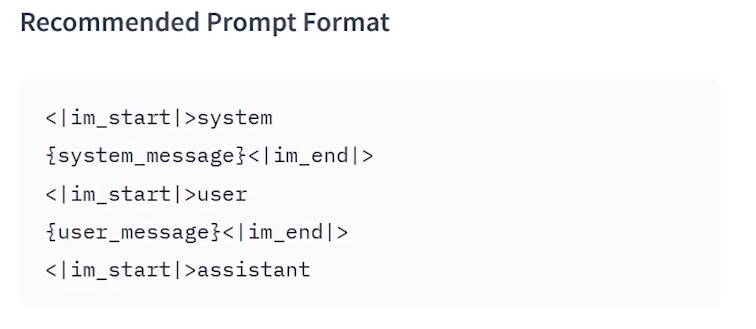

In [28]:


# Criando prompt do sistema
mensagem_sistema = 'You are a helpful artificial intelligence assistant.' # quem é o modelo ? um programador um gerente um assistente
prompt_sistema = f'<|im_start|>system\n{mensagem_sistema}<|im_end|>\n'

# Criando prompt do usuário
mensagem_usuario = 'How can I become a Python programmer?' # perunta paraele respoder 
print('Sua pergunta: ', mensagem_usuario)
prompt_usuario = f'<|im_start|>user\n{mensagem_usuario}<|im_end|>\n'

# Criando prompt final e verificando
conversa = f'{prompt_sistema}{prompt_usuario}<|im_start|>assistant\n'
"mensagem para mandar para o chatbot", conversa


Sua pergunta:  How can I become a Python programmer?


('mensagem para mandar para o chatbot',
 '<|im_start|>system\nYou are a helpful artificial intelligence assistant.<|im_end|>\n<|im_start|>user\nHow can I become a Python programmer?<|im_end|>\n<|im_start|>assistant\n')

In [29]:
print(conversa)

<|im_start|>system
You are a helpful artificial intelligence assistant.<|im_end|>
<|im_start|>user
How can I become a Python programmer?<|im_end|>
<|im_start|>assistant



In [30]:
# Pegando a resposta do bot
resposta = chatbot(conversa)
print(resposta)

[{'generated_text': '<|im_start|>system\nYou are a helpful artificial intelligence assistant.<|im_end|>\n<|im_start|>user\nHow can I become a Python programmer?<|im_end|>\n<|im_start|>assistant\nThere are many ways to become a Python programmer. One of the most common ways is to start a program that you can use to generate code. Here are a few ways to do this:\n1. Write a list of 10 popular programming languages that you can use to generate code.\n2. Write a Python program that you can use to generate code.\n3. Write a Python program that you can use to generate code.\n4. Write a Python program that you can use to generate code.\n5. Write a Python program that you can use to generate code.\n6. Write a Python program that you can use to generate code.\n7. Write a Python program that you can use to generate code.\n8. Write a Python program that you can use to generate code.\n9. Write a Python program that you can use to generate code.\n10. Write a Python program that you can use to gener

In [32]:
print(resposta[0]['generated_text'])


<|im_start|>system
You are a helpful artificial intelligence assistant.<|im_end|>
<|im_start|>user
How can I become a Python programmer?<|im_end|>
<|im_start|>assistant
There are many ways to become a Python programmer. One of the most common ways is to start a program that you can use to generate code. Here are a few ways to do this:
1. Write a list of 10 popular programming languages that you can use to generate code.
2. Write a Python program that you can use to generate code.
3. Write a Python program that you can use to generate code.
4. Write a Python program that you can use to generate code.
5. Write a Python program that you can use to generate code.
6. Write a Python program that you can use to generate code.
7. Write a Python program that you can use to generate code.
8. Write a Python program that you can use to generate code.
9. Write a Python program that you can use to generate code.
10. Write a Python program that you can use to generate code.
11. Write a Python program

In [33]:


# Formatando a resposta
resposta_formatada = resposta[0]['generated_text'].split('<|im_start|>assistant\n')[-1].rstrip('<|im_end|>') # quebra onde tem o texto |im_start|>assistant e pega o ultimo valor e retira o im_end
print('Resposta do bot: ', resposta_formatada)


Resposta do bot:  There are many ways to become a Python programmer. One of the most common ways is to start a program that you can use to generate code. Here are a few ways to do this:
1. Write a list of 10 popular programming languages that you can use to generate code.
2. Write a Python program that you can use to generate code.
3. Write a Python program that you can use to generate code.
4. Write a Python program that you can use to generate code.
5. Write a Python program that you can use to generate code.
6. Write a Python program that you can use to generate code.
7. Write a Python program that you can use to generate code.
8. Write a Python program that you can use to generate code.
9. Write a Python program that you can use to generate code.
10. Write a Python program that you can use to generate code.
11. Write a Python program that you can use to generate code.
12. Write a Python program that you can use to generate code.
13. Write a Python program that you can use to genera

In [37]:

# How can I become a Python programmer?
# Gerando loop de prompt
conversa = mensagem_sistema
while True:
    mensagem_usuario = input('Escreva sua pergunta (em inglês): ')
    print("Pergunta do Usuario", mensagem_usuario)
    conversa += f'<|im_start|>user\n{mensagem_usuario}<|im_end|>\n<|im_start|>assistant'
    resposta = chatbot(conversa)
    conversa = resposta[0]['generated_text']
    resposta_formatada = conversa.split('<|im_start|>assistant\n')[-1].rstrip('<|im_end|>')
    print(f'Resposta do bot: {resposta_formatada}')


Pergunta do Usuario  How can I become a Python programmer?
Resposta do bot: There are many ways to become a machine learning assistant. One of the most common ways is to train a human to perform tasks that are automated, such as writing a text summarizing the results of a task. You can also use Python's built-in "Hello World" or "Happiness", which is a type of machine learning algorithm used by humans to train a human to perform tasks that are not explicitly programmed with a human mind. For example, a human can be trained on a dataset of 1,000 human robots, and 1,000 human robots. Another way to train a human to perform tasks that are not explicitly programmed with a human mind, such as writing a text summarizing the results of a task. Another way to train a human to perform tasks that are not explicitly programmed with a human mind are:

Analyze the data and make decisions
1. Analyze the data and make decisions
2. Identify the key points in the data: 
- Create a list of tasks that ar

KeyboardInterrupt: Interrupted by user

Eles guardam o historico do modelo (até certo ponto para não ficar muito pesado para processar)

Eles não necessáriamente dão modelos de resposta corretos e coerente pois eles apenas tentam completar com a palavra logica mais provavel

--> Como o modelo tem poucos parametros ele gera textos semanticamente e gramaticalmente corretos porém não necessáriamente corretos 
mas não necessáriamente com significado semantico

In [39]:
print(conversa)

You are a helpful artificial intelligence assistant.<|im_start|>user
 How can I become a Python programmer?<|im_end|>
<|im_start|>assistant
There are many ways to become a machine learning assistant. One of the most common ways is to train a human to perform tasks that are automated, such as writing a text summarizing the results of a task. You can also use Python's built-in "Hello World" or "Happiness", which is a type of machine learning algorithm used by humans to train a human to perform tasks that are not explicitly programmed with a human mind. For example, a human can be trained on a dataset of 1,000 human robots, and 1,000 human robots. Another way to train a human to perform tasks that are not explicitly programmed with a human mind, such as writing a text summarizing the results of a task. Another way to train a human to perform tasks that are not explicitly programmed with a human mind are:

Analyze the data and make decisions
1. Analyze the data and make decisions
2. Identi

## Aula 5 - inference Api

```
 Pegar modelos da hugging face direto da api sem baixar no computador
```

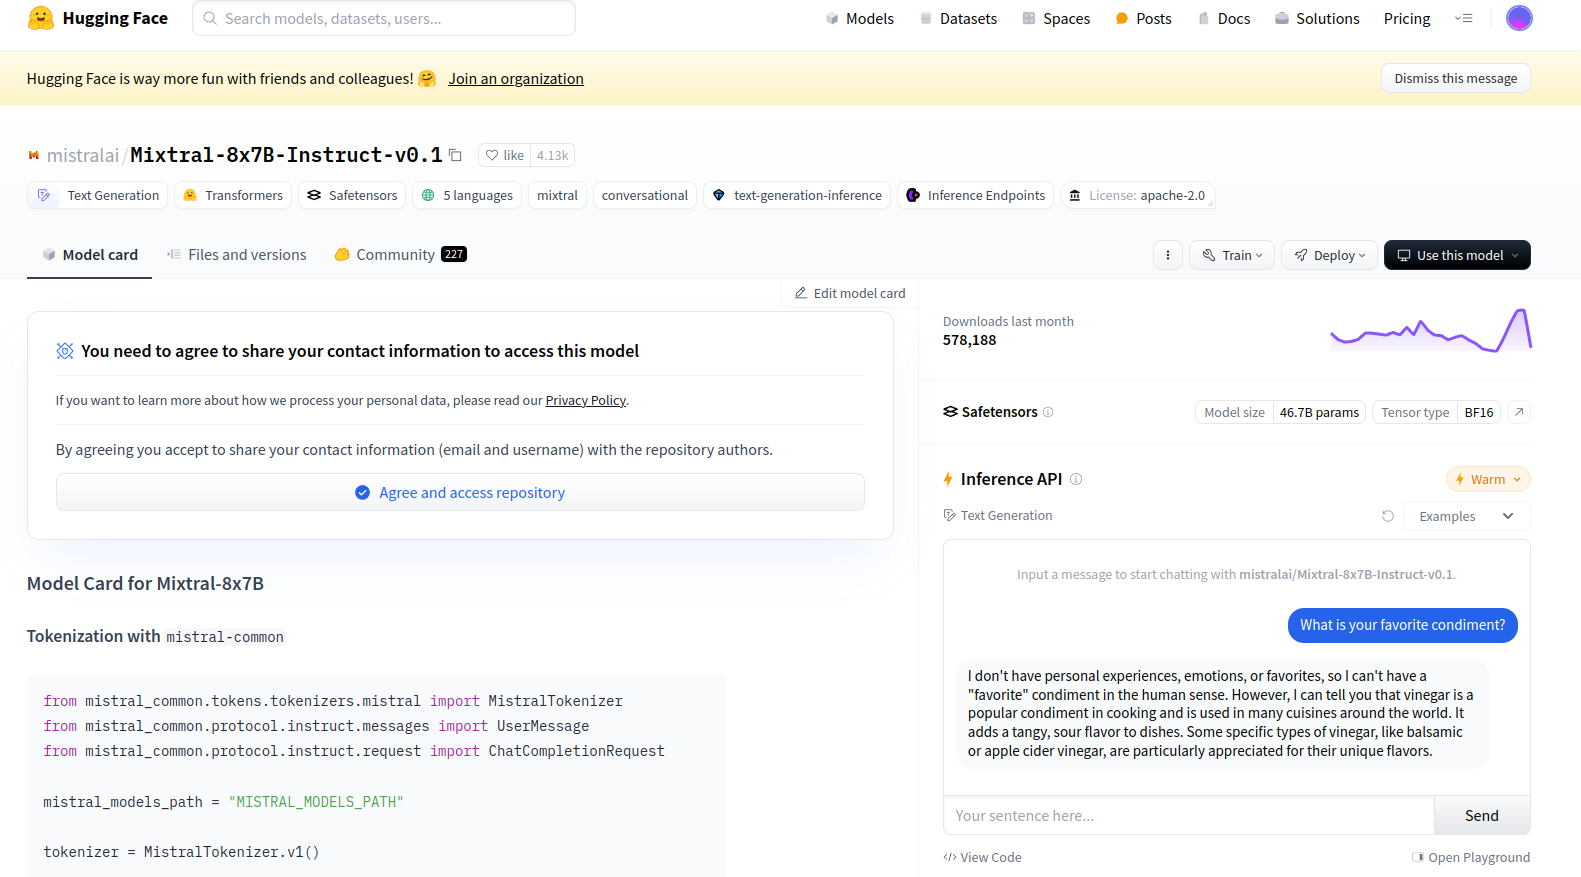

Utilizado para modelos grandes e pesados que não podemos processar      
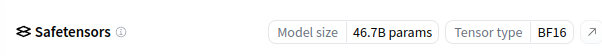

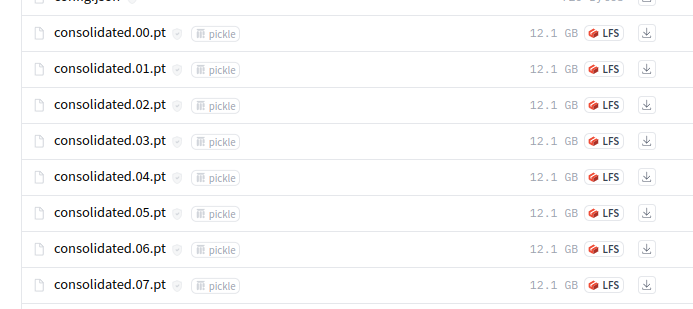

In [43]:
f"{12*8} GB --  de modelo"  

'96 GB --  de modelo'

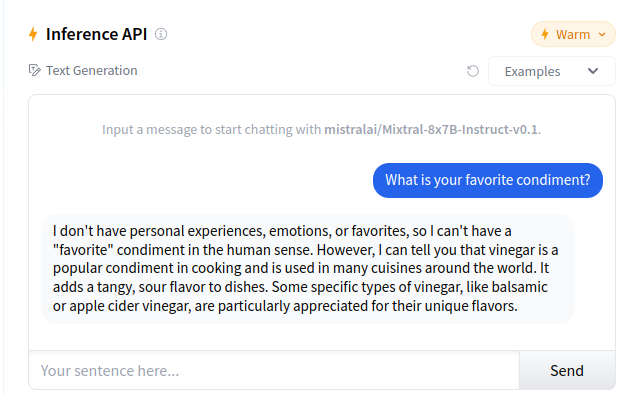

In [40]:
# # Resposta "bruta" sem templating de strings
import requests
modelo = 'mistralai/Mixtral-8x7B-Instruct-v0.1'
url = f"https://api-inference.huggingface.co/models/{modelo}" # endereço do modelo
json = { # inputs que queremos mandar para o modelo
    'inputs': 'Hello, what is your name?',
    'options': {'use_cache': False, 'wait_for_model': True},
}

In [41]:


response = requests.post(url, json=json)

print(response)
print(response.json())

<Response [200]>
[{'generated_text': 'Hello, what is your name? Hello! I am Tom. Nice to meet you. What do you think about looking at a video, that is a bit longer about how companies can help reduce the impostor syndrome among their employees? That sounds great. I have a few minutes. Excellent! Let’s take a look. Impostor syndrome is a psychological pattern that can negatively affect workers, making them feel less about themselves and their abilities. However, companies can help combat impostor syndrome with simple steps.'}]


O modelo está falando com ele mesmo importante utilizar os tokens para indicar que está numa conversa e indeicar o inicio e fim da conversa

In [45]:


# Adicionando templating
from transformers import AutoTokenizer

In [44]:

# criando um modelo que se encaixa em qualquer modelo usando o tokenizer
chat = [
    {"role": "user", "content": "Olá, qual o seu nome?"},
    {"role": "assistant", "content": "Olá, eu sou um modelo de AI. Como posso ajudar?"},
    {"role": "user", "content": "Gostaria de aprender Python. Você tem alguma dica?"},
]

In [50]:
# ! huggingface-cli login -> colocar o token (https://huggingface.co/settings/tokens)

In [51]:
tokenizer_mixtral = AutoTokenizer.from_pretrained('mistralai/Mixtral-8x7B-Instruct-v0.1')


tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [53]:


template_mixtral = tokenizer_mixtral.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)# tokenize=False responde como texto em si e não numeros add_generation_prompt ele adiciona o token para ele responder (no caso [/inst])
print('----- Chat formatado para modelo Mixtral -----')
print(template_mixtral)

----- Chat formatado para modelo Mixtral -----
<s> [INST] Olá, qual o seu nome? [/INST] Olá, eu sou um modelo de AI. Como posso ajudar?</s> [INST] Gostaria de aprender Python. Você tem alguma dica? [/INST]


In [54]:

tokenizer_llama = AutoTokenizer.from_pretrained("Felladrin/Llama-68M-Chat-v1")
template_llama = tokenizer_llama.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
print('----- Chat formatado para modelo Llama -----')
print(template_llama)

----- Chat formatado para modelo Llama -----
<|im_start|>user
Olá, qual o seu nome?<|im_end|>
<|im_start|>assistant
Olá, eu sou um modelo de AI. Como posso ajudar?<|im_end|>
<|im_start|>user
Gostaria de aprender Python. Você tem alguma dica?<|im_end|>
<|im_start|>assistant



In [60]:

# Resposta ajustada com uso de templating
import requests
from transformers import AutoTokenizer

modelo = 'mistralai/Mixtral-8x7B-Instruct-v0.1'

chat = [
    {"role": "user", "content": "Hello, what is your name?"},
]

tokenizer = AutoTokenizer.from_pretrained(modelo)
chat_str = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

url = f"https://api-inference.huggingface.co/models/{modelo}"
json = {
    'inputs': chat_str,
    'options': {'use_cache': False, 'wait_for_model': True},
}


# 'use_cache': False, retira o cache das buscas evita que o modelo responda a mesma pergunta com a mesma resposta
# 
#  'wait_for_model': True -> ele mostra o erro caso não retorne no tempo (não fica esperando a resposta da api infinitamente)
response = requests.post(url, json=json)
print(response.json())

{'error': 'Rate limit reached. Please log in or use a HF access token'}


In [59]:
print(response.json()[0]["generated_text"])

<s> [INST] Hello, what is your name? [/INST] Hello! I'm an AI language model and I don't have a personal name. You can call me Assistant. How can I assist you today?


In [62]:


# Resposta ajustada com uso de templating em loop
import requests
from transformers import AutoTokenizer

modelo = 'mistralai/Mixtral-8x7B-Instruct-v0.1'
tokenizer = AutoTokenizer.from_pretrained(modelo)
url = f"https://api-inference.huggingface.co/models/{modelo}"
chat = []
while True:
    mensagem = input('Faça sua pergunta em inglês ("q" para sair):')
    if mensagem == 'q':
        break
    chat.append({'role': 'user', 'content': mensagem})
    chat_str = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
    json = {
        'inputs': chat_str,
        'parameters': {'max_new_tokens': 1_000},
        'options': {'use_cache': False, 'wait_for_model': True},
    }
    response = requests.post(url, json=json).json()
    mensagem_chatbot = response[0]['generated_text'].split('[/INST]')[-1]
    print('Resposta do chatbot:', mensagem_chatbot)
    chat.append({'role': 'assistant', 'content': mensagem_chatbot})

print(chat)


## Aula 6 Modelos restritos

encerrei a instalação pq o modelo é mt grande

### baixando modelos

In [2]:
from transformers import pipeline

token = ""
modelo = pipeline(task="text-generation", model ='google/gemma-7b-it',token=token)
modelo

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [7]:
from transformers import pipeline

import os

import dotenv
import requests
dotenv.load_dotenv()

token = os.environ['HF_TOKEN']
modelo = pipeline(task="text-generation", model ='google/gemma-7b-it',token=token)
modelo

model-00001-of-00004.safetensors:   7%|6         | 336M/5.00G [00:00<?, ?B/s]

KeyboardInterrupt: 

### Usando a Api

In [5]:
import os

import dotenv
import requests
dotenv.load_dotenv()

modelo = 'google/gemma-7b-it'
url = f"https://api-inference.huggingface.co/models/{modelo}"

json = {
    'inputs': 'Olá, qual o seu nome?',
    'options': {'use_cache': False, 'wait_for_model': True},
}

token = os.environ['HF_TOKEN']
headers = {'Authorization': f'Bearer {token}'}

response = requests.post(url, json=json, headers=headers)
print(response.json())


## Aula 7 - aplicações --> Tradução

In [9]:
! pip install git+https://github.com/openai/whisper.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-gnur735d
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-gnur735d
  Resolved https://github.com/openai/whisper.git to commit 279133e3107392276dc509148da1f41bfb532c7e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 44.0 MB/s eta 0:00:0031m51.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 39.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=802837 sha256=c342925cd1fb90d9f16104c9f6f6763e9b9f8ff32ebd3f0be6989b9c9e15a359
  Stored in directory: /tmp/pip-ep

In [11]:
# Tradução usando transformers
from transformers import pipeline

modelo = "facebook/mbart-large-50-many-to-many-mmt"
mensagem = "Olá! Estou aprendendo a programar em Python e a usar modelos de inteligência artificial pelo Hugging Face."

tradutor = pipeline("translation", model=modelo)
traducao = tradutor(mensagem, src_lang='pt_XX', tgt_lang='en_XX')

print(traducao)

In [18]:



# Tradução de diferentes frases para diferentes línguas
from transformers import pipeline

modelo = "facebook/mbart-large-50-many-to-many-mmt"
mensagens = [
    "Olá! Estou aprendendo a programar em Python e a usar modelos de inteligência artificial pelo Hugging Face.",
    "Vamos nos encontrar às 15h da próxima sexta-feira. Eu acho que todos os meus amigos vão estar lá!",
    "Três tigres tristes comeram três pratos de trigo.",
    "Ser feliz sem motivo é a mais autêntica forma de felicidade.",
]
linguas = [
    'en_XX',
    'es_XX',
    'fr_XX',
]

tradutor = pipeline("translation", model=modelo)
for lingua in linguas:
    print(f'Traduzindo do português para {lingua}...')
    traducoes = tradutor(mensagens, src_lang='pt_XX', tgt_lang=lingua)
    for mensagem, traducao in zip(mensagens, traducoes):
        print(f'Frase original: "{mensagem}"')
        frase_traduzida = traducao['translation_text']
        print(f'Frase em {lingua}: "{frase_traduzida}"')



In [ ]:

# Tradução via Inference API
import requests

modelo = "facebook/mbart-large-50-many-to-many-mmt"
url = f"https://api-inference.huggingface.co/models/{modelo}"

mensagens = [
    "Olá! Estou aprendendo a programar em Python e a usar modelos de inteligência artificial pelo Hugging Face.",
    "Vamos nos encontrar às 15h da próxima sexta-feira. Eu acho que todos os meus amigos vão estar lá!",
    "Três tigres tristes comeram três pratos de trigo.",
    "Ser feliz sem motivo é a mais autêntica forma de felicidade.",
]
linguas = [
    'en_XX',
    'es_XX',
    'fr_XX',
]

for lingua in linguas:
    print(f'Traduzindo do português para {lingua}...')
    json = {
        'inputs': mensagens,
        'parameters': {'src_lang': 'pt_XX', 'tgt_lang': lingua},
        'options': {'use_cache': False, 'wait_for_model': True},
    }
    response = requests.post(url, json=json)
    traducoes = response.json()
    for mensagem, traducao in zip(mensagens, traducoes):
        print(f'Frase original: "{mensagem}"')
        frase_traduzida = traducao['translation_text']
        print(f'Frase em {lingua}: "{frase_traduzida}"')


# Aula 8 - Resumo


In [20]:
# Usando um modelo de resumo em português
import requests

modelo = "csebuetnlp/mT5_multilingual_XLSum"
url = f"https://api-inference.huggingface.co/models/{modelo}"

with open('noticia.txt') as f:
    texto = f.read()

json = {
    'inputs': texto,
    'parameters': {'min_length': 100},  # Em tokens
    'options': {'use_cache': False, 'wait_for_model': True},
}
response = requests.post(url, json=json)
print(response.json())


[{'summary_text': 'O app TikTok é um dos mais populares aplicativos do mundo, mas o governo dos Estados Unidos quer que ele tenha um novo dono nos EUA e não seja alvo de sanções do presidente Joe Biden, que está sendo acusado de envolvimento no serviço com os seus usuários estrangeiros, segundo'}]


In [21]:
print(response.json()[0]["summary_text"])


O app TikTok é um dos mais populares aplicativos do mundo, mas o governo dos Estados Unidos quer que ele tenha um novo dono nos EUA e não seja alvo de sanções do presidente Joe Biden, que está sendo acusado de envolvimento no serviço com os seus usuários estrangeiros, segundo


## Aula 9 - Classificação de texto

In [26]:
from transformers import pipeline

modelo = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
classificador = pipeline("text-classification", model=modelo)

reviews = [
    "Até então não tenho do que reclamar. Estou usando pra estudo, está bem tranquilo até aqui.",
    "Acho que vale o custo benefício, caso seja para usos básicos.",
    "A bateria do notebook está descarregando muito rápido.",
    "Eu estava com muito medo de me arrepender da compra. Mas eu realmente gostei! Ótimo demais, comprem!",
    "Muito bom, recomendo!",
    "Não comprem, caro demais pelo que oferece.",
    "Super custo benefício, pelo preço que paguei superou todas as minhas expectativas.",
    "Excelente, zero arrependimentos. Muito muito bom.",
    "Esperava um pouco mais. Mas é um produto bom. Não coloquei mais estrelas pois não usei direito.",
]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [27]:

for review in reviews:
    print(f'Avaliação: "{review}"')
    resultado = classificador(review)
    # print(resultado)
    prob = resultado[0]['score'] * 100
    print('Análise de sentimento:', resultado[0]['label'], f'{prob:.2f}%')

Avaliação: "Até então não tenho do que reclamar. Estou usando pra estudo, está bem tranquilo até aqui."
Análise de sentimento: negative 40.40%
Avaliação: "Acho que vale o custo benefício, caso seja para usos básicos."
Análise de sentimento: positive 84.37%
Avaliação: "A bateria do notebook está descarregando muito rápido."
Análise de sentimento: negative 41.32%
Avaliação: "Eu estava com muito medo de me arrepender da compra. Mas eu realmente gostei! Ótimo demais, comprem!"
Análise de sentimento: negative 55.59%
Avaliação: "Muito bom, recomendo!"
Análise de sentimento: positive 90.50%
Avaliação: "Não comprem, caro demais pelo que oferece."
Análise de sentimento: negative 48.10%
Avaliação: "Super custo benefício, pelo preço que paguei superou todas as minhas expectativas."
Análise de sentimento: positive 94.04%
Avaliação: "Excelente, zero arrependimentos. Muito muito bom."
Análise de sentimento: positive 84.16%
Avaliação: "Esperava um pouco mais. Mas é um produto bom. Não coloquei mais e

In [28]:

# Demonstrando o argumento top_k
from transformers import pipeline

modelo = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
classificador = pipeline("text-classification", model=modelo)

review = "Acho que vale o custo benefício, caso seja para usos básicos."
resultado = classificador(review, top_k=None)

print(review)
print('Análise de sentimento:', resultado)


Acho que vale o custo benefício, caso seja para usos básicos.
Análise de sentimento: [{'label': 'positive', 'score': 0.8436755537986755}, {'label': 'negative', 'score': 0.09438315778970718}, {'label': 'neutral', 'score': 0.06194132938981056}]


In [29]:
resultado[0]

{'label': 'positive', 'score': 0.8436755537986755}

In [35]:
resultado[0]["label"]

'positive'

In [39]:
somador =0 
for emocao in resultado:
    # print(emocao)
    print(f"{emocao['label']} - {emocao['score']}")
    somador+= emocao["score"]
print(somador)

positive - 0.8436755537986755
negative - 0.09438315778970718
neutral - 0.06194132938981056
1.0000000409781933


In [40]:

# Modelo de classificação de emoções (em inglês)
from transformers import pipeline

classificador = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions")

frases = [
    'I am feeling a bit better, thanks for asking!',
    'Well, it could be worse.',
    'This is awful!',
    'I am very happy with the test results!',
    'Unbelievable!',
    'Go away!!!',
]
for frase in frases:
    print(f'frase: "{frase}"')
    resultado = classificador(frase)
    prob = resultado[0]['score'] * 100
    print('Análise de sentimento:', resultado[0]['label'], f'{prob:.2f}%')

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

frase: "I am feeling a bit better, thanks for asking!"
Análise de sentimento: gratitude 97.71%
frase: "Well, it could be worse."
Análise de sentimento: disgust 62.90%
frase: "This is awful!"
Análise de sentimento: disgust 82.67%
frase: "I am very happy with the test results!"
Análise de sentimento: joy 90.37%
frase: "Unbelievable!"
Análise de sentimento: surprise 81.78%
frase: "Go away!!!"
Análise de sentimento: anger 75.42%


/home/anamarcacini/.local/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [41]:


# Modelo de análise de sentimento em frases de contexto financeiro.
# import requests
#
# url = "https://api-inference.huggingface.co/models/ProsusAI/finbert"
# frases = [
#     'However, the growth margin slowed down due to the financial crisis.',
#     'The company laid off thousands of employees last week.',
#     'According to their updated strategy for the years 2009-2012, the company targets a long-term net sales growth',
#     'Result before taxes decreased to nearly EUR 14.5mn, compared to nearly EUR 20mn in the previous accounting period.'
# ]
#
# for frase in frases:
#     json = {
#         'inputs': frase,
#         'options': {'use_cache': False, 'wait_for_model': True},
#     }
#     response = requests.post(url, json=json)
#     print('Frase original:', frase)
#     print(response.json(), '\n')


In [42]:







# Modelo de análise de ironia em tweets
from transformers import pipeline

detector_ironia = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-irony", top_k=None)

for frase in [
    "@Mountgrace lol i know! its so frustrating isnt it?!",
    "I don't like clowns but I'm going to be one.",
    "Now I remember why I buy books online @user #servicewithasmile",
    "Simply having a wonderful christmas time :D",
]:
    print(f'frase: "{frase}"')
    resultado = detector_ironia(frase)
    resultado_mais_provavel = resultado[0][0]
    prob = resultado_mais_provavel['score'] * 100
    print('Análise de sentimento:', resultado_mais_provavel['label'], f'{prob:.2f}%')


config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

frase: "@Mountgrace lol i know! its so frustrating isnt it?!"
Análise de sentimento: non_irony 77.92%
frase: "I don't like clowns but I'm going to be one."
Análise de sentimento: non_irony 57.39%
frase: "Now I remember why I buy books online @user #servicewithasmile"
Análise de sentimento: irony 90.69%
frase: "Simply having a wonderful christmas time :D"
Análise de sentimento: non_irony 83.65%


## Baixando datasets

In [44]:
! pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 KB 935.1 kB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 3.3 MB/s eta 0:00:006.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 KB 1.9 MB/s eta 0:00:001.4 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 KB 2.9 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.9/447.9 KB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0

In [45]:

# Datasets grandes demais para a memória 
from datasets import load_dataset # biblioteca para baixar datasets do Hugging Face

dataset = load_dataset("imdb", streaming=True) # essa forma o dataset não é aberto e carregado todo ele em memoria
dataset_treino = dataset['train']

for linha in dataset_treino:
    print(linha)  # Primeira linha
    break

linhas = dataset_treino.take(3)
print(linhas)
print(list(linhas))

for linha in dataset_treino:
    print(linha)  # Primeira linha
    break


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [46]:
linha

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [48]:
dataset

IterableDatasetDict({
    train: IterableDataset({
        features: ['text', 'label'],
        n_shards: 1
    })
    test: IterableDataset({
        features: ['text', 'label'],
        n_shards: 1
    })
    unsupervised: IterableDataset({
        features: ['text', 'label'],
        n_shards: 1
    })
})

Mostra que temos 50000 dados não classificados

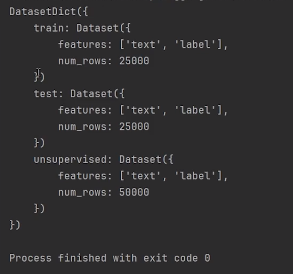

In [50]:
# Manipulação básica de um Dataset
from datasets import load_dataset

dataset = load_dataset("imdb")
print(dataset)

dataset_treino = dataset['train']
print(dataset_treino)

print(dataset_treino[9])
print(dataset_treino[9]['label'])
print(dataset_treino['label'])

# Convertendo para um DataFrame do pandas
from datasets import load_dataset

dataset = load_dataset("imdb")
dataset_treino = dataset['train']
df = dataset_treino.to_pandas()
print(df)


train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})
{'text': "This is said to be a personal film for Peter Bogdonavitch. He based it on his life but changed things around to fit the characters, who are detectives. These detectives date beautiful models and have no problem getting them. Sounds more like a millionaire playboy filmmaker than a detective, doesn't it? This entire movie was written by Peter, and it shows how out of touch with real people he was. You're supposed to write what you know, and he did that, indeed. And leaves the audience bored and confused, and jealous, for that matter. This is a curio for people who want to see Dorothy Stratten, who was murdered right after filmin